# Boston_city_Crime Data Analysis
DATA: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston

## Data Cleaning and Data Analysis

## import the useful libraries.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import os
import glob

import matplotlib.pyplot as plt
%matplotlib inline

## **combine csv files**

In [2]:
os.chdir("/Users/vaishali/Desktop/DAB-103/csv_files")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv1 = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv1.to_csv("/Users/vaishali/Desktop/DAB-103/Boston_combined.csv", index=False, encoding='utf-8-sig')

#encoding = ‘utf-8-sig’ is added to overcome the issue when exporting ‘Non-English’ languages.

/Users/vaishali/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## **Load the data**

In [3]:
df = pd.read_csv(r"/Users/vaishali/Desktop/DAB-103/Boston_combined.csv",encoding='latin',low_memory=False)

In [4]:
df


,ï»¿INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240,NaN,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760,NaN,2016-09-01 09:00:00,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328,NaN,2016-09-06 13:01:00,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503169,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503170,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503171,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
503172,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"


## **Understanding the data**

In [5]:
df.head()

,ï»¿INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240,NaN,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760,NaN,2016-09-01 09:00:00,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328,NaN,2016-09-06 13:01:00,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"


In [6]:
df.tail()

,ï»¿INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
503169,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503170,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503171,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
503172,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
503173,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"


In [7]:
df.shape

(503174, 17)

In [8]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,503174.000000,503174.000000,503174.000000,503174.000000,482772.000000,4.827720e+05
mean,2347.408988,2018.207173,6.328061,13.031309,36.030031,-6.051956e+01
std,1193.468024,1.676226,3.278696,6.326971,15.059160,2.528234e+01
min,100.000000,2016.000000,1.000000,0.000000,-1.000000,-7.117867e+01
25%,1102.000000,2017.000000,4.000000,9.000000,42.282624,-7.109221e+01
50%,3005.000000,2018.000000,6.000000,14.000000,42.315812,-7.107210e+01
75%,3201.000000,2020.000000,9.000000,18.000000,42.344126,-7.105474e+01
max,99999.000000,2021.000000,12.000000,23.000000,42.395042,5.249691e-08


In [9]:
df.columns

Index(['ï»¿INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [10]:
df.nunique()

ï»¿INCIDENT_NUMBER     467086
OFFENSE_CODE              242
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       286
DISTRICT                   13
REPORTING_AREA            881
SHOOTING                    3
OCCURRED_ON_DATE       384408
YEAR                        6
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                  12977
Lat                     33652
Long                    33658
Location                33668
dtype: int64

In [11]:
df['OFFENSE_CODE_GROUP'].unique()

array(['Harassment', 'Simple Assault', 'Larceny', 'Fraud',
       'Confidence Games', 'Investigate Person', 'Counterfeiting',
       'Violations', 'Residential Burglary', 'Aggravated Assault',
       'Property Lost', 'Vandalism', 'Investigate Property',
       'Embezzlement', 'Assembly or Gathering Violations',
       'Police Service Incidents', 'Other', 'Missing Person Located',
       'Missing Person Reported', 'Larceny From Motor Vehicle',
       'Property Related Damage', 'Firearm Violations', 'Warrant Arrests',
       'License Plate Related Incidents', 'Medical Assistance',
       'Auto Theft', 'Ballistics', 'HOME INVASION',
       'Restraining Order Violations', 'Criminal Harassment',
       'Verbal Disputes', 'Property Found', 'Robbery',
       'Motor Vehicle Accident Response', 'Disorderly Conduct',
       'Other Burglary', 'Towed', 'Auto Theft Recovery',
       'Commercial Burglary', 'License Violation', 'Fire Related Reports',
       'Drug Violation', 'Landlord/Tenant Dispute

## **Cleaning and Transforming the data**


In [12]:
df.isnull()

,ï»¿INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503169,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
503170,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
503171,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
503172,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

ï»¿INCIDENT_NUMBER          0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     203518
OFFENSE_DESCRIPTION         0
DISTRICT                 3262
REPORTING_AREA              0
SHOOTING               298452
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               203613
STREET                  10614
Lat                     20402
Long                    20402
Location                    0
dtype: int64

In [14]:
# rename the column name
df = df.rename(columns={'ï»¿INCIDENT_NUMBER': 'INCIDENT_NUMBER'})

In [15]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240,NaN,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760,NaN,2016-09-01 09:00:00,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328,NaN,2016-09-06 13:01:00,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503169,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503170,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503171,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
503172,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"


In [16]:
df['INCIDENT_NUMBER'].is_unique

False

In [17]:
index=(df[df['OFFENSE_CODE_GROUP'].isnull()==True].index.values)

In [18]:
index

array([200768, 200769, 200770, ..., 404283, 404284, 404285])

### Replace the missing value with N/A

In [19]:
df['OFFENSE_CODE_GROUP'].fillna("N/A",inplace=True)
index=(df[df['OFFENSE_CODE_GROUP'].isnull()==True].index.values)
index

array([], dtype=int64)

In [20]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240,NaN,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760,NaN,2016-09-01 09:00:00,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113,NaN,2016-08-02 00:00:00,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328,NaN,2016-09-06 13:01:00,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503169,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503170,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,NaN,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503171,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
503172,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"


In [21]:
df['REPORTING_AREA'].fillna("N/A",inplace=True)
index=(df[df['REPORTING_AREA'].isnull()==True].index.values)
index

array([], dtype=int64)

In [22]:
df['REPORTING_AREA'].fillna("N/A",inplace=True)
index=(df[df['REPORTING_AREA'].isnull()==True].index.values)
index

array([], dtype=int64)

In [23]:
df['INCIDENT_NUMBER'].fillna("N/A",inplace=True)
index=(df[df['INCIDENT_NUMBER'].isnull()==True].index.values)
index

array([], dtype=int64)

In [24]:
df['OFFENSE_CODE'].fillna("N/A",inplace=True)
index=(df[df['OFFENSE_CODE'].isnull()==True].index.values)
index

array([], dtype=int64)

In [25]:
df['OFFENSE_DESCRIPTION'].fillna("N/A",inplace=True)
index=(df[df['OFFENSE_DESCRIPTION'].isnull()==True].index.values)
index

array([], dtype=int64)

In [26]:
df['DISTRICT'].fillna("N/A",inplace=True)
index=(df[df['DISTRICT'].isnull()==True].index.values)
index

array([], dtype=int64)

In [27]:
df['REPORTING_AREA'].fillna("N/A",inplace=True)
index=(df[df['REPORTING_AREA'].isnull()==True].index.values)
index

array([], dtype=int64)

In [28]:
df['SHOOTING'].fillna("N/A",inplace=True)
index=(df[df['SHOOTING'].isnull()==True].index.values)
index

array([], dtype=int64)

In [29]:
df['OCCURRED_ON_DATE'].fillna("N/A",inplace=True)
index=(df[df['OCCURRED_ON_DATE'].isnull()==True].index.values)
index

array([], dtype=int64)

In [30]:
df['YEAR'].fillna("N/A",inplace=True)
index=(df[df['YEAR'].isnull()==True].index.values)
index

array([], dtype=int64)

In [31]:
df['HOUR'].fillna("N/A",inplace=True)
index=(df[df['HOUR'].isnull()==True].index.values)
index

array([], dtype=int64)

In [32]:
df['UCR_PART'].fillna("N/A",inplace=True)
index=(df[df['UCR_PART'].isnull()==True].index.values)
index

array([], dtype=int64)

In [33]:
df['STREET'].fillna("N/A",inplace=True)
index=(df[df['STREET'].isnull()==True].index.values)
index

array([], dtype=int64)

In [34]:
df['Lat'].fillna("N/A",inplace=True)
index=(df[df['Lat'].isnull()==True].index.values)
index

array([], dtype=int64)

In [35]:
df['Long'].fillna("N/A",inplace=True)
index=(df[df['Long'].isnull()==True].index.values)
index

array([], dtype=int64)

In [36]:
df['Location'].fillna("N/A",inplace=True)
index=(df[df['Location'].isnull()==True].index.values)
index

array([], dtype=int64)

In [37]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240,N/A,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760,N/A,2016-09-01 09:00:00,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113,N/A,2016-08-02 00:00:00,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113,N/A,2016-08-02 00:00:00,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328,N/A,2016-09-06 13:01:00,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503169,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503170,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503171,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,N/A,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
503172,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,N/A,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"


In [38]:
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [39]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
503169     True
503170     True
503171    False
503172     True
503173    False
Length: 503174, dtype: bool

In [40]:
# count duplicate rows
df.duplicated().sum()

468

In [41]:
# Extract duplicate rows
df.loc[df.duplicated(), :]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
3602,I162103452,3502,Missing Person Located,MISSING PERSON - LOCATED,E5,697,N/A,2016-12-20 06:00:00,2016,12,Tuesday,6,Part Three,KENNETH ST,42.285236,-71.148861,"(42.28523631, -71.14886058)"
5367,I162101528,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2016-12-13 12:45:00,2016,12,Tuesday,12,Part One,CLIFTON ST,42.320956,-71.069926,"(42.32095643, -71.06992610)"
5529,I162101338,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C6,215,Y,2016-12-12 20:03:00,2016,12,Monday,20,Part One,D ST,42.336706,-71.053308,"(42.33670628, -71.05330809)"
5838,I162101004,3125,Warrant Arrests,WARRANT ARREST,B2,605,Y,2016-12-11 16:13:00,2016,12,Sunday,16,Part Three,SUNSET ST,42.331101,-71.108704,"(42.33110131, -71.10870352)"
5840,I162101004,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,605,Y,2016-12-11 16:13:00,2016,12,Sunday,16,Part One,SUNSET ST,42.331101,-71.108704,"(42.33110131, -71.10870352)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503166,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503167,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503169,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503170,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"


### Dropping duplicate rows

In [42]:
df = df.drop_duplicates()

In [43]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240,N/A,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
1,I192073288,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D14,760,N/A,2016-09-01 09:00:00,2016,9,Thursday,9,Part Two,BEECHCROFT ST,42.351673,-71.161152,"(42.35167293, -71.16115206)"
2,I192071326,619,Larceny,LARCENY ALL OTHERS,A1,113,N/A,2016-08-02 00:00:00,2016,8,Tuesday,0,Part One,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
3,I192071326,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,A1,113,N/A,2016-08-02 00:00:00,2016,8,Tuesday,0,Part Two,HIGH ST,42.353448,-71.056581,"(42.35344834, -71.05658072)"
4,I192071292,1107,Fraud,FRAUD - IMPERSONATION,B2,328,N/A,2016-09-06 13:01:00,2016,9,Tuesday,13,Part Two,FERNBORO ST,42.311296,-71.077283,"(42.31129587, -71.07728269)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503160,I070720870-00,637,Larceny,LARCENY IN A BUILDING UNDER $50,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part One,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503163,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503168,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,N/A,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
503171,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,N/A,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"


### Sort the values by ascending order in YEAR column

In [44]:
df = df.sort_values(by="YEAR", ascending=True)

In [45]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074738,2629,Harassment,HARASSMENT,C11,240,N/A,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)"
66268,I162035950,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,A7,35,N/A,2016-05-09 01:33:00,2016,5,Monday,1,Part Three,S BREMEN ST,42.367803,-71.039433,"(42.36780297, -71.03943328)"
66267,I162035953,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,B3,465,N/A,2016-05-09 01:51:00,2016,5,Monday,1,Other,EDGEWATER DR,42.267067,-71.095,"(42.26706714, -71.09500032)"
66266,I162035954,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A7,17,N/A,2016-05-09 02:06:00,2016,5,Monday,2,Part Two,CHELSEA ST,42.379772,-71.0273,"(42.37977166, -71.02730041)"
66265,I162035955,3115,Investigate Person,INVESTIGATE PERSON,C11,350,N/A,2016-05-09 02:58:08,2016,5,Monday,2,Part Three,FREEPORT ST,42.304683,-71.056279,"(42.30468252, -71.05627865)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293338,212057687,3005,N/A,SICK ASSIST,E18,519,0,2021-08-17 05:50:00,2021,8,Tuesday,5,N/A,HYDE PARK AVE,42.259657,-71.123197,"(42.2596567578895, -71.1231966521834)"
293339,212057686,3005,N/A,SICK ASSIST,A1,65,0,2021-08-17 00:22:00,2021,8,Tuesday,0,N/A,CAMBRIDGE ST,42.361223,-71.065932,"(42.3612232435872, -71.0659323470323)"
293340,212057684,1415,N/A,GRAFFITI,A1,,0,2021-08-17 03:14:00,2021,8,Tuesday,3,N/A,PORTLAND STREET,0.0,0.0,"(0, 0)"
293327,212057701,1106,N/A,FRAUD - CREDIT CARD / ATM FRAUD,B3,465,0,2021-08-12 00:00:00,2021,8,Thursday,0,N/A,BLUE HILL AVE,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)"


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502706 entries, 0 to 299494
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   INCIDENT_NUMBER      502706 non-null  object
 1   OFFENSE_CODE         502706 non-null  int64 
 2   OFFENSE_CODE_GROUP   502706 non-null  object
 3   OFFENSE_DESCRIPTION  502706 non-null  object
 4   DISTRICT             502706 non-null  object
 5   REPORTING_AREA       502706 non-null  object
 6   SHOOTING             502706 non-null  object
 7   OCCURRED_ON_DATE     502706 non-null  object
 8   YEAR                 502706 non-null  int64 
 9   MONTH                502706 non-null  int64 
 10  DAY_OF_WEEK          502706 non-null  object
 11  HOUR                 502706 non-null  int64 
 12  UCR_PART             502706 non-null  object
 13  STREET               502706 non-null  object
 14  Lat                  502706 non-null  object
 15  Long                 502706 non-nu

In [47]:
#to save cleaned file
df.to_csv('/Users/vaishali/Desktop/DAB-103/Boston_Cleaned.csv', index=False)

### **Searching for outliers**

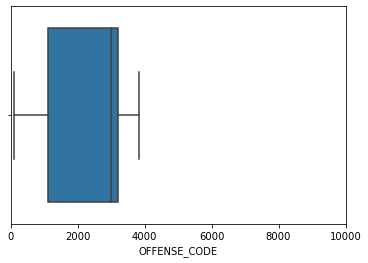

In [48]:
sns.boxplot(x=df['OFFENSE_CODE'])
plt.xlim([0, 10000])
plt.show()

#### There is no outlieres in our dataset.

 ### **searching for correlation between data elements**

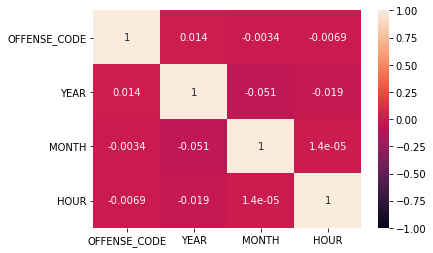

In [49]:
# plotting correlation heatmap
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)



## Exploratory Data Analysis


### 1.Types of Crimes in data

#### To make it easy to show, only asked to return the first ten results.

In [50]:
# Types of Crimes
df.OFFENSE_CODE_GROUP.value_counts().iloc[1:10]

Motor Vehicle Accident Response    35235
Larceny                            23850
Medical Assistance                 23054
Investigate Person                 17900
Other                              16465
Simple Assault                     14898
Drug Violation                     14786
Vandalism                          14149
Verbal Disputes                    12960
Name: OFFENSE_CODE_GROUP, dtype: int64

Text(0.5, 1.0, 'crimes occured most')

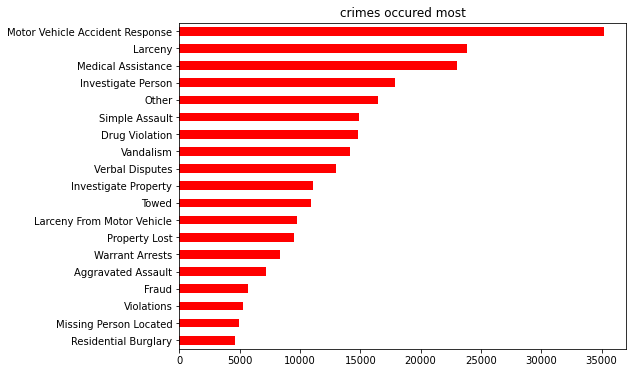

In [51]:
# the result for visualization.
df.OFFENSE_CODE_GROUP.value_counts().iloc[1:20].sort_values().plot(kind = "barh", color="red", figsize=(8,6))
plt.title("crimes occured most")

In [52]:
# Defining a function which will consider the following crimes as individual crimes and rest of as Others:
def topnine(row):
    keep = ["Motor Vehicle Accident Response", "Larceny",
            "Medical Assistance", "Investigate Person",
            "Drug Violation",
            "Simple Assault", "Vandalism",
            "Verbal Disputes", "Towed"]
    
    if row not in keep:
        
        return "OTHERS"
    else:
        
        return row

In [53]:
df["New_Type"] = df["OFFENSE_CODE_GROUP"].apply(topnine)

In [54]:
# Creating a dataframe returing '%' of top crime offense and others:

df_offense_top = df.groupby(['New_Type'])['New_Type'].count()/len(df)*100


df_offense_top

New_Type
Drug Violation                      2.941282
Investigate Person                  3.560729
Larceny                             4.744324
Medical Assistance                  4.585981
Motor Vehicle Accident Response     7.009067
OTHERS                             66.636364
Simple Assault                      2.963561
Towed                               2.166077
Vandalism                           2.814568
Verbal Disputes                     2.578048
Name: New_Type, dtype: float64

<AxesSubplot:title={'center':'Top Crimes-% (2015-2021)'}, ylabel='New_Type'>

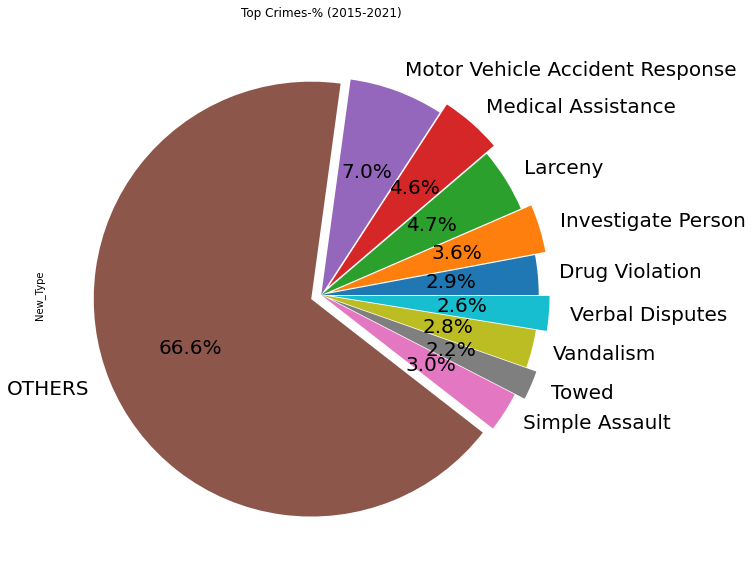

In [55]:
explode = [0,0.05,0,0.05,0,0.05,0,0.05,0,0.05]

df_offense_top.plot.pie(autopct="%.1f%%",title="Top Crimes-% (2015-2021)", figsize=(20,10), explode=explode, fontsize=20)

### **1.1 Analyzing a Specific Crime**

In [56]:
larceny=df[df.OFFENSE_CODE_GROUP.str.contains("Larceny").fillna(False)]

In [57]:
#    Check the size of the data “Larceny”
larceny.shape

(33621, 18)

### Analyzing Places for larceny crime



**want to know the data of crime incidents in different locations of Boston and, more specifically, what places in Boston are more dangerous.**




**Looking at the result, we can see the locations in Boston where larceny is more likely to happen are  Boylston St and Washington St.**



<AxesSubplot:title={'center':'Places where crime occurred most'}, ylabel='STREET'>

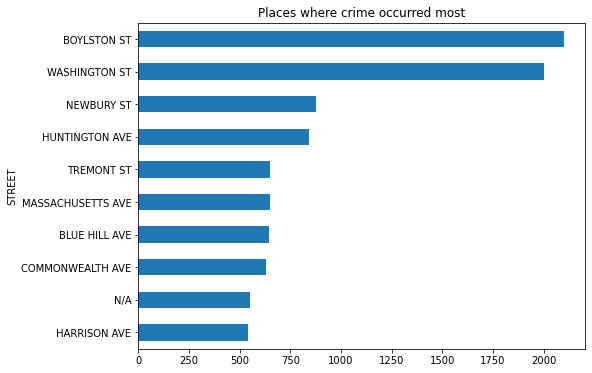

In [58]:
# visualization
larceny.groupby("STREET").size().sort_values(ascending = False).head(10).sort_values().plot(kind = "barh", figsize = (8,6), title = "Places where crime occurred most"
)

## 2. Analyzing crime comitted on the day of the week, month, year and Hour.

### 2.1 Analyzing crime on the day of the week

In [59]:
crime_weekly= df.groupby(['DAY_OF_WEEK'])['DAY_OF_WEEK'].count()/len(df)*100
crime_weekly

DAY_OF_WEEK
Friday       15.237534
Monday       14.295632
Saturday     14.124160
Sunday       12.696686
Thursday     14.572533
Tuesday      14.421153
Wednesday    14.652302
Name: DAY_OF_WEEK, dtype: float64

In [60]:
# but the returned DAY_OF_WEEK are not in order:

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# sorting the data according to the week

crime_weekly = crime_weekly[sorter]
crime_weekly

DAY_OF_WEEK
Monday       14.295632
Tuesday      14.421153
Wednesday    14.652302
Thursday     14.572533
Friday       15.237534
Saturday     14.124160
Sunday       12.696686
Name: DAY_OF_WEEK, dtype: float64

Text(0.5, 0, 'Day of the week')

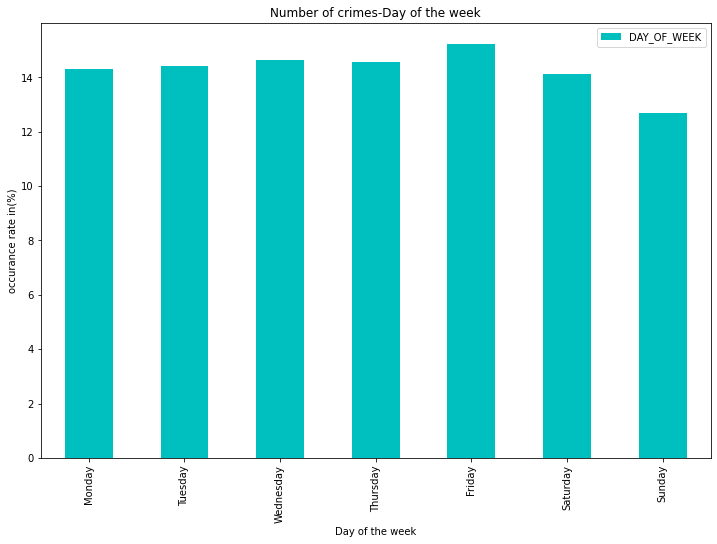

In [61]:
crime_weekly.plot(legend= True, kind='bar', title='Number of crimes-Day of the week', figsize=(12,8), color='c')
plt.ylabel('occurance rate in(%)')
plt.xlabel('Day of the week')

### 2.2 Analyzing crime month vise

<AxesSubplot:title={'center':'Number of crimes months wise'}, xlabel='MONTH'>

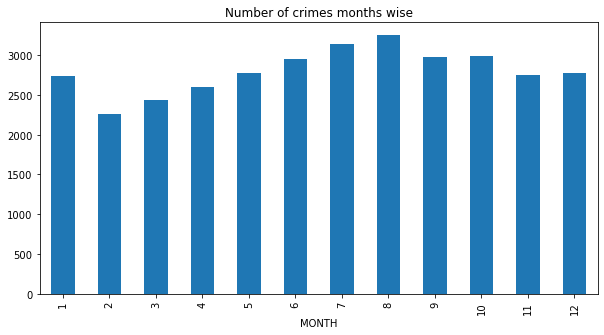

In [62]:
larceny.groupby("MONTH").size().plot(kind = "bar", figsize=(10,5), title='Number of crimes months wise')

### 2.3 Analyzing crime commited yearly

In [63]:
crime_yearly= df.groupby(['YEAR'])['YEAR'].count()/len(df)*100
#returns the % of crime in perticular year of total crimes commited from2016 to 2021

crime_yearly

YEAR
2016    19.749317
2017    20.130653
2018    19.639113
2019    13.445433
2020    14.102477
2021    12.933007
Name: YEAR, dtype: float64

Text(0.5, 0, 'year')

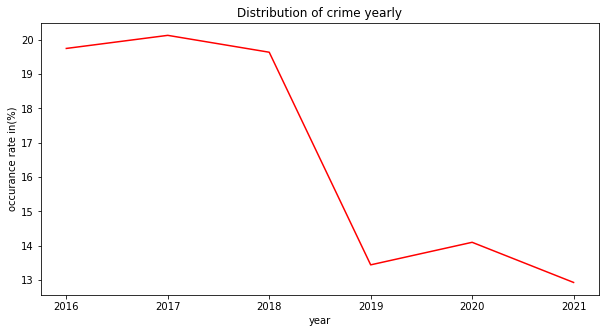

In [64]:
crime_yearly.plot(kind='line', title='Distribution of crime yearly', figsize=(10,5), color='red')
plt.ylabel('occurance rate in(%)')
plt.xlabel('year')

### 2.4 number of **larceny crime** incidents changes within a day

<AxesSubplot:title={'center':'Distribution of crime by hours'}, xlabel='HOUR'>

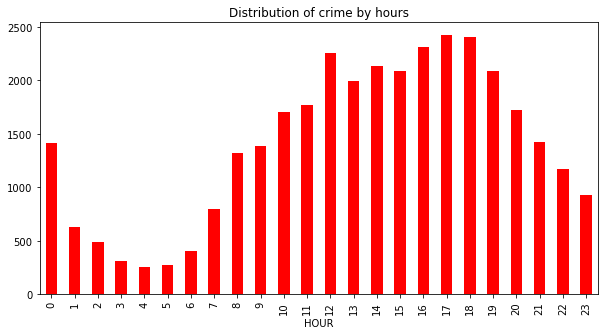

In [65]:
larceny.groupby("HOUR").size().plot(kind= "bar", title='Distribution of crime by hours', figsize=(10,5), color='red' ) 


In [66]:
larceny[larceny.YEAR==2018].groupby(['MONTH','HOUR']).size().unstack(0)

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
HOUR,,,,,,,,,,,,
0,39.0,45.0,39.0,49.0,43.0,50.0,40.0,40.0,42.0,43.0,35.0,40.0
1,17.0,19.0,18.0,14.0,19.0,22.0,20.0,19.0,18.0,15.0,17.0,16.0
2,14.0,11.0,5.0,13.0,15.0,15.0,10.0,15.0,16.0,18.0,13.0,20.0
3,5.0,8.0,6.0,5.0,8.0,14.0,10.0,11.0,11.0,3.0,6.0,5.0
4,6.0,4.0,5.0,4.0,18.0,6.0,4.0,7.0,7.0,7.0,7.0,9.0
5,4.0,7.0,NaN,6.0,7.0,4.0,14.0,9.0,9.0,5.0,8.0,8.0
6,8.0,6.0,14.0,8.0,12.0,12.0,16.0,14.0,14.0,12.0,10.0,10.0
7,28.0,18.0,11.0,18.0,33.0,27.0,29.0,33.0,25.0,27.0,31.0,21.0
8,31.0,24.0,36.0,33.0,38.0,35.0,40.0,44.0,38.0,44.0,40.0,31.0


array([<AxesSubplot:title={'center':'1'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'2'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'3'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'4'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'5'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'6'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'7'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'8'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'9'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'10'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'11'}, xlabel='HOUR'>,
       <AxesSubplot:title={'center':'12'}, xlabel='HOUR'>], dtype=object)

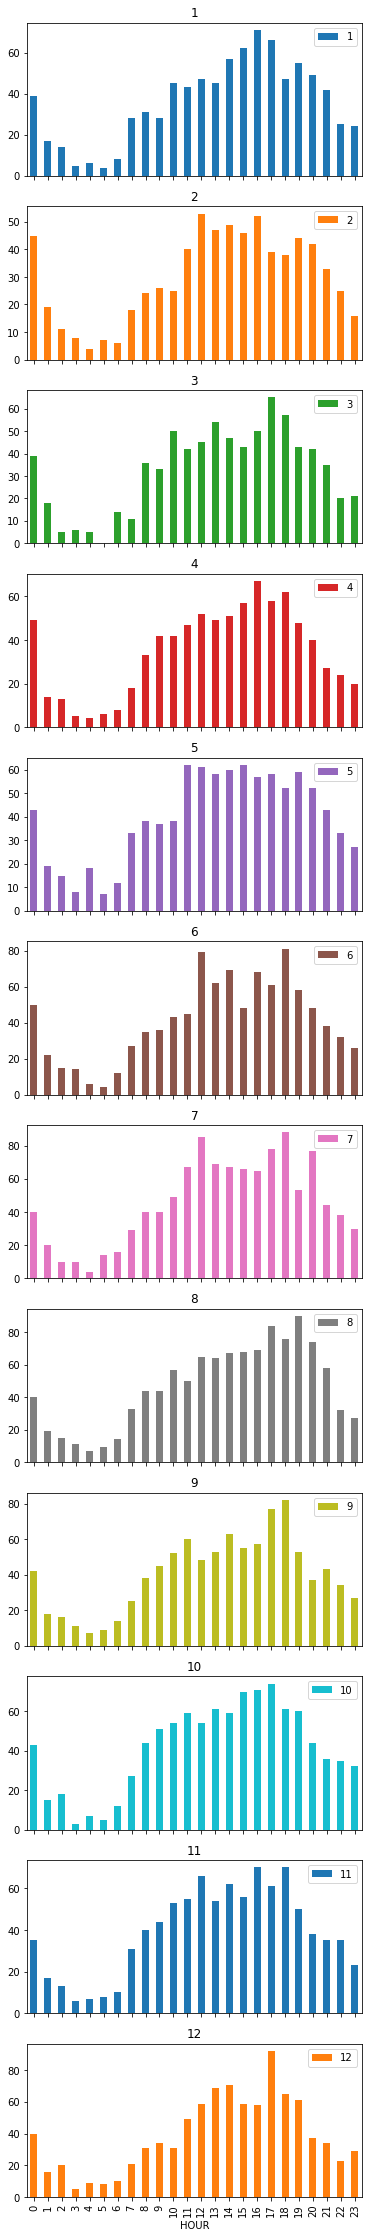

In [67]:
larceny[larceny.YEAR==2018].groupby(['MONTH','HOUR']).size().unstack(0).plot(subplots=True, kind = "bar", figsize = (6, 40))

### 3. Exploring "SHOOTING" Data

In [68]:
# creating a dataframe with no NaNs:

df_shooting = df[df.SHOOTING.notnull()]

In [69]:
df_shooting.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,New_Type
0,I192074738,2629,Harassment,HARASSMENT,C11,240,N/A,2016-09-01 00:00:00,2016,9,Thursday,0,Part Two,CONRAD ST,42.318724,-71.062001,"(42.31872369, -71.06200077)",OTHERS
66268,I162035950,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,A7,35,N/A,2016-05-09 01:33:00,2016,5,Monday,1,Part Three,S BREMEN ST,42.367803,-71.039433,"(42.36780297, -71.03943328)",Medical Assistance
66267,I162035953,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,B3,465,N/A,2016-05-09 01:51:00,2016,5,Monday,1,Other,EDGEWATER DR,42.267067,-71.095,"(42.26706714, -71.09500032)",OTHERS
66266,I162035954,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A7,17,N/A,2016-05-09 02:06:00,2016,5,Monday,2,Part Two,CHELSEA ST,42.379772,-71.0273,"(42.37977166, -71.02730041)",Simple Assault
66265,I162035955,3115,Investigate Person,INVESTIGATE PERSON,C11,350,N/A,2016-05-09 02:58:08,2016,5,Monday,2,Part Three,FREEPORT ST,42.304683,-71.056279,"(42.30468252, -71.05627865)",Investigate Person


**Analyzing Shooting happens yearly**

In [70]:
shooting_yearly= df_shooting.groupby(['YEAR'])['YEAR'].count()/len(df_shooting)*100

shooting_yearly

YEAR
2016    19.749317
2017    20.130653
2018    19.639113
2019    13.445433
2020    14.102477
2021    12.933007
Name: YEAR, dtype: float64

<AxesSubplot:title={'center':'Shooting - % (2016-2021)'}, ylabel='YEAR'>

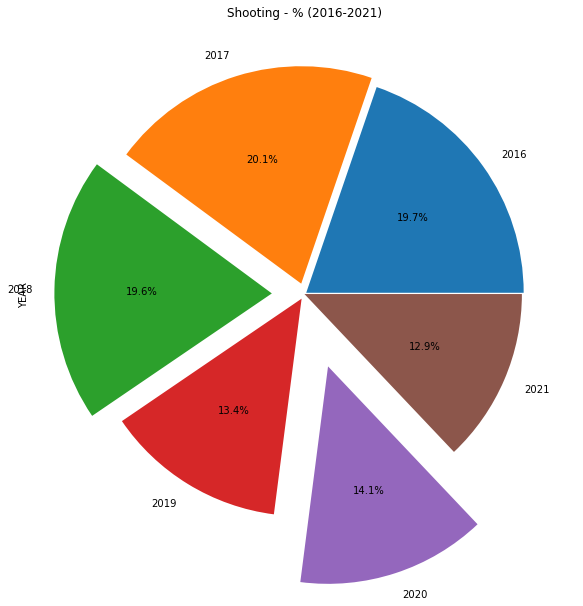

In [71]:
explode = [0.01,0.05,00.15,0.025,0.35,0]

shooting_yearly.plot.pie(autopct="%.1f%%", title="Shooting - % (2016-2021)", figsize=(20,10), explode=explode)

**Analyzing shooting happens monthly**

In [72]:
shooting_monthly= df_shooting.groupby(['MONTH'])['MONTH'].count()/len(df_shooting)*100
shooting_monthly

MONTH
1     8.394966
2     7.695552
3     8.503181
4     8.205392
5     9.109698
6     9.283955
7     9.404503
8     9.712834
9     9.306434
10    7.838777
11    6.806165
12    5.738543
Name: MONTH, dtype: float64

<AxesSubplot:title={'center':'Shooting per month-% (2016-2021)'}, ylabel='MONTH'>

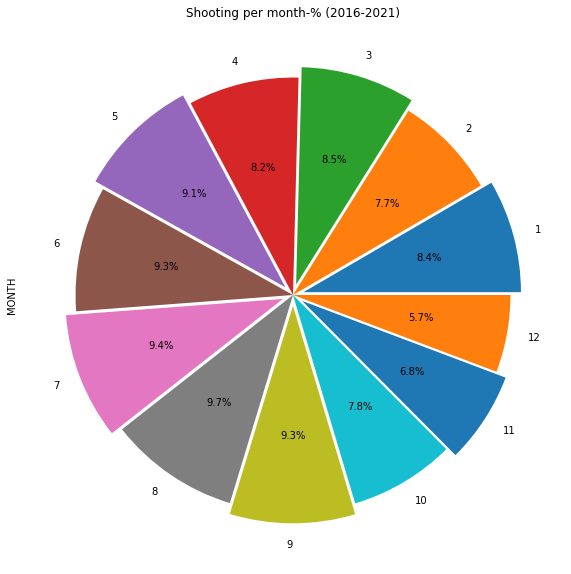

In [73]:
explode = [0.05,0,0.05,0,0.05,0,0.05,0,0.05,0,0.05,0]

shooting_monthly.plot.pie(autopct="%.1f%%", title="Shooting per month-% (2016-2021)", figsize=(20,10), fontsize=10, explode=explode)

### 4.Analyzing crime DISTRICT vise

In [74]:
df.DISTRICT.value_counts().iloc[:20]

B2          77045
C11         66333
D4          64717
B3          56499
A1          55043
C6          37594
D14         32625
E18         28171
E13         27935
E5          21915
A7          20687
A15         10504
N/A          3262
External      376
Name: DISTRICT, dtype: int64

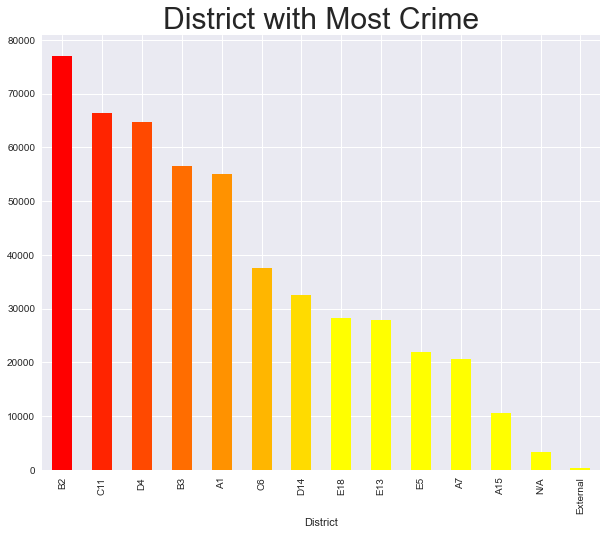

In [75]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('seaborn')

color = plt.cm.autumn(np.linspace(0, 2, 15))
df['DISTRICT'].value_counts().plot.bar(color = color, figsize = (10, 8))

plt.title('District with Most Crime',fontsize = 30)
plt.xlabel('District')
plt.xticks(rotation = 90)
plt.show()

#### Here, B2,C11 and D4 is most dangeorous district where crime occures more frequently.

### 5. Analyzing Burglary occured on all week days

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

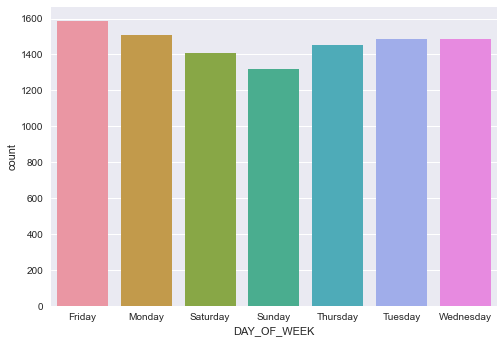

In [76]:
#Number of crimes on Robbery/Burglary occured on all week days

robbery=df[df['OFFENSE_CODE_GROUP'].str.contains("Robbery|BURGLARY", na=False,case=False)].groupby(['DAY_OF_WEEK']).size().reset_index(name='count')
sns.barplot(x = "DAY_OF_WEEK",y= "count", data=robbery)

### 6.Analyzing which period of time in the day is more safe/Dangeorous .

#### splitting the day into 'midnight','morning','afternoon','evening'

In [77]:
df['period']= pd.cut( df.HOUR,[0,6,12,18,23],labels=['MIDNIGHT','MORNING','AFTERNOON','EVENING'],include_lowest=True)
df['period']

0          MIDNIGHT
66268      MIDNIGHT
66267      MIDNIGHT
66266      MIDNIGHT
66265      MIDNIGHT
            ...    
293338     MIDNIGHT
293339     MIDNIGHT
293340     MIDNIGHT
293327     MIDNIGHT
299494    AFTERNOON
Name: period, Length: 502706, dtype: category
Categories (4, object): ['MIDNIGHT' < 'MORNING' < 'AFTERNOON' < 'EVENING']

### 6.1 find out the maximum number of shootings happening in a particular period.


In [78]:
shooting=df.loc[df['SHOOTING']=='Y'].groupby('period').size().reset_index(name='count')

<AxesSubplot:xlabel='period', ylabel='count'>

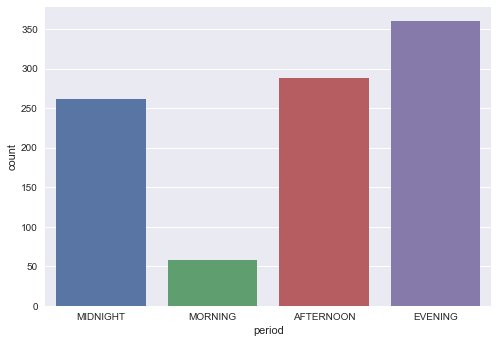

In [79]:
sns.barplot(x ="period",y= "count", data=shooting)


####  we can see from the graph that most shooting occured in the evening time in past years.

### 7. Analyzing in between which hour/time crime occured most.

/Users/vaishali/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOUR', ylabel='count'>

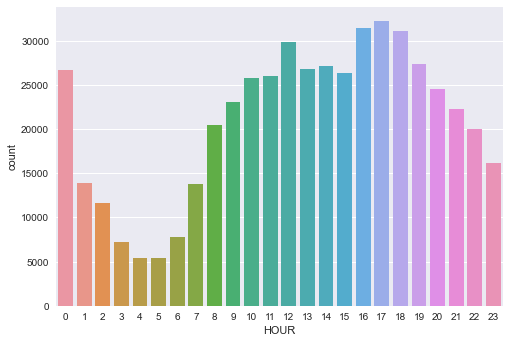

In [80]:
sns.countplot('HOUR',data= df)

#### We can see that, In the evening most crime occured at 5:00 PM,4:00 PM and 6:00 PM.